In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 18})

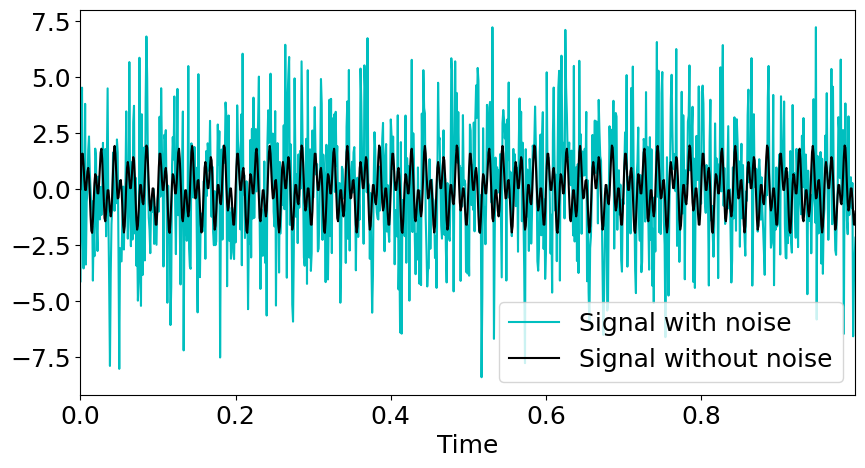

In [26]:
#Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t)) #add noise

#Plot
plt.plot(t, f, color = 'c' , label = 'Signal with noise' )
plt.plot(t, f_clean, color = 'k' , label = 'Signal without noise' )
plt.xlim(t[0], t[-1])
plt.xlabel( 'Time' )
plt.legend()


This code creates a simple signal that is a combination of two sine waves, one with a frequency of 50 Hz and the other with a frequency of 120 Hz. The signal is defined over the time interval from 0 to 1 with a time step of 0.001 seconds.

The clean signal is stored in the variable f_clean and a random noise is added to it to create a noisy version of the signal, which is stored in the variable f.


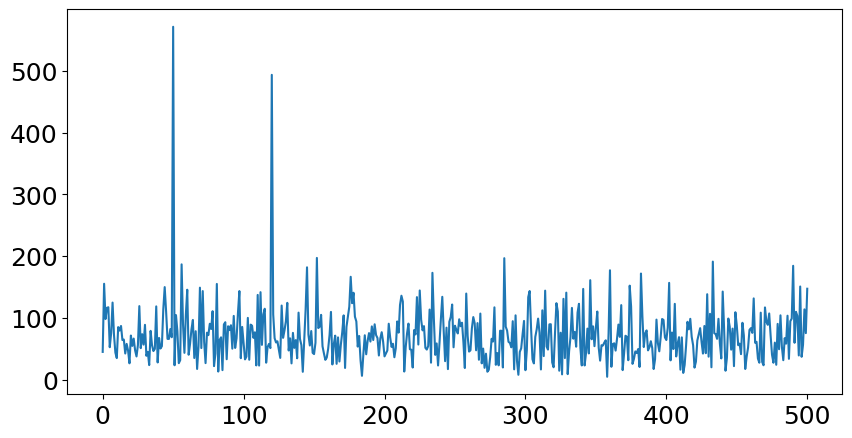

In [27]:
from scipy.fft import rfft,rfftfreq
n    = len(t)
yf   = rfft(f)
xf   = rfftfreq(n,dt)
plt.plot(xf,np.abs(yf))

# Here we use fft to get the frequency components of the signal 
# This is a one-sided spectrum, so the frequency vector is half as long as the signal
# It shows the two distinct peaks at 50 and 120 Hz and noise


Here we use fft to get the frequency components of the signal
from scipy.fft import rfft,rfftfreq imports the rfft and rfftfreq functions from the SciPy library. These functions are used to perform a real-valued fast Fourier transform (FFT) and generate the corresponding frequency array, respectively.


This is a one-sided spectrum, so the frequency vector is half as long as the signal
The rfft function computes the one-dimensional FFT of a real-valued array, f, which in this case is the noisy signal created in the previous code block. This results in a complex-valued array, yf, which contains information about the frequency components of the input signal.

This plot shows the magnitude spectrum of the signal, or the distribution of the signal's power across different frequency components. You should be able to see two peaks in the plot corresponding to the two frequency components of the original signal (50Hz and 120Hz) plus a peak in the zero frequency due to the DC component


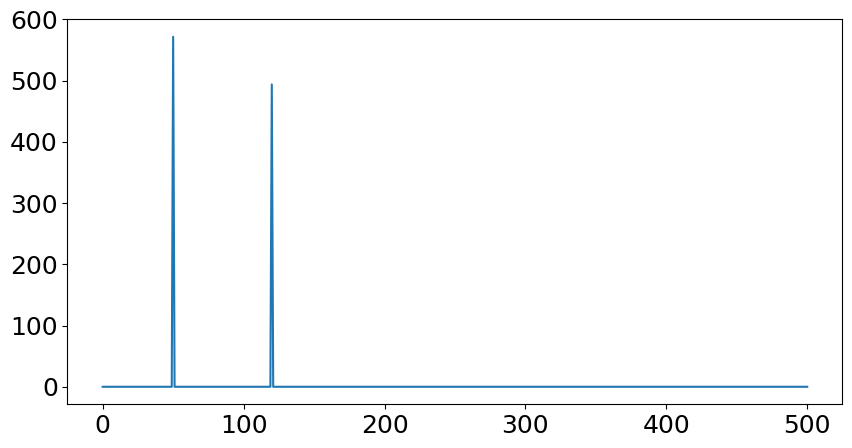

In [28]:
yf_abs      = np.abs(yf) 
indices     = yf_abs>300   # filter out those value under 300
yf_clean    = indices * yf # noise frequency will be set to 0
plt.plot(xf,np.abs(yf_clean))

# Here we use the indices to filter out the noise frequency
# The noise frequency will be set to 0
# The signal will be restored to the original signal without noise

 Here we use the indices to filter out the noise frequency

The noise frequency will be set to 0

The signal will be restored to the original signal without noise


(-6.0, 8.0)

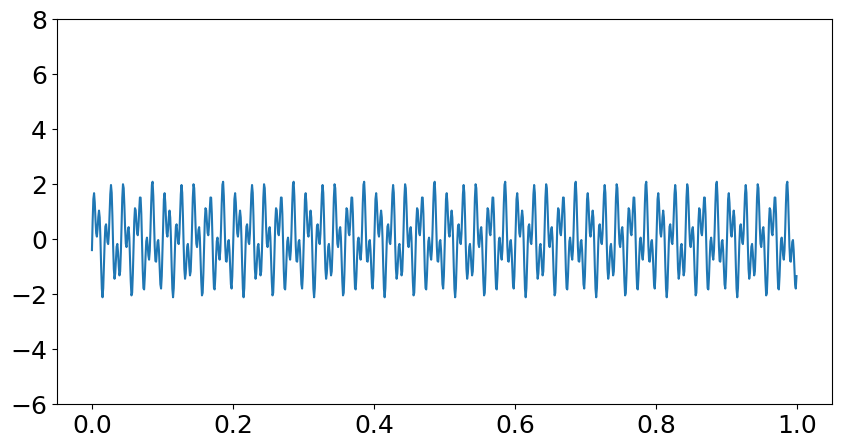

In [29]:
from scipy.fft import irfft
new_f_clean = irfft(yf_clean)
plt.plot(t,new_f_clean)
plt.ylim(-6,8)

# Here we use irfft to get the signal back
# The signal is restored to the original signal without noise


Here we use irfft to get the signal back. The irfft function (Inverse Real-valued Fast Fourier Transform) is used to perform the inverse Fourier Transform of the signal. It converts a signal from the frequency domain back to the time domain.

The irfft function takes in the FFT coefficients of the signal, which in this case is yf_clean, and returns an array of the same shape as the original input signal.

The signal is restored to the original signal without noise.
